In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories = data.target_names

In [6]:
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
train = fetch_20newsgroups(subset='train', categories=categories)

In [8]:
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [11]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [12]:
model.fit(train.data, train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [13]:
labels = model.predict(test.data)

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

In [15]:
mat

array([[166,   0,   0,   1,   0,   1,   0,   0,   1,   1,   1,   3,   0,
          6,   3, 123,   4,   8,   0,   1],
       [  1, 252,  15,  12,   9,  18,   1,   2,   1,   5,   2,  41,   4,
          0,   6,  15,   4,   1,   0,   0],
       [  0,  14, 258,  45,   3,   9,   0,   2,   1,   3,   2,  25,   1,
          0,   6,  23,   2,   0,   0,   0],
       [  0,   5,  11, 305,  17,   1,   3,   6,   1,   0,   2,  19,  13,
          0,   5,   3,   1,   0,   0,   0],
       [  0,   3,   8,  23, 298,   0,   3,   8,   1,   3,   1,  16,   8,
          0,   2,   8,   3,   0,   0,   0],
       [  1,  21,  17,  13,   2, 298,   1,   0,   1,   1,   0,  23,   0,
          1,   4,  10,   2,   0,   0,   0],
       [  0,   1,   3,  31,  12,   1, 271,  19,   4,   4,   6,   5,  12,
          6,   3,   9,   3,   0,   0,   0],
       [  0,   1,   0,   3,   0,   0,   4, 364,   3,   2,   2,   4,   1,
          1,   3,   3,   4,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   2,  10, 371,   0,   0,  

<Figure size 2160x720 with 0 Axes>

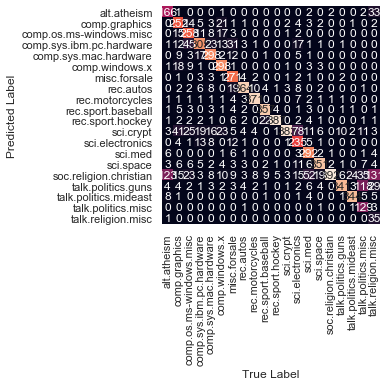

<Figure size 2160x720 with 0 Axes>

In [16]:
sns.heatmap(mat.T, square=True, annot=True, 
            fmt='d', cbar=False, 
            xticklabels=train.target_names,
           yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.figure(figsize = (30,10))

### Predicting Category on new data based on the trained model

In [17]:
def predict_category(s,  train=train, model=model):
    pred = model.predict([s])
    pred1 = train.target_names[pred[0]]
    return pred1

In [18]:
predict_category('Sending Load to international space station')

'sci.space'

In [19]:
predict_category('Audi is better than BMW')

'rec.autos'

In [20]:
predict_category('President of United States of America')

'talk.politics.misc'

In [21]:
predict_category('Harley Davidson is the best Motor cycle')

'rec.motorcycles'

We are able to correctly classify text into different groups based on which category they belong to using Naive Bayes classfier